In [1]:
import pickle
import torch
import sys
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/OptimizedBERT')
original_sys_path = sys.path.copy()
sys.path.append('/content/drive/MyDrive/OptimizedBERT')

from sentence_evaluator import ModelSentenceEvaluator
from dataset_evaluator import DatasetEvaluator

sys.path.append('/content/drive/MyDrive/OptimizedBERT')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = "training_data.txt"
training_data = []
with open(file_path, 'r') as file:
    for line in file:
        training_data.append(line.strip())

training_data = list(set(training_data))
print("Training Dataset Length: ",len(training_data))

Training Dataset Length:  4


In [3]:
# Load relevant models

def load_model(model_path):
    with open(model_path, 'rb') as f:
        return pickle.load(f)

folder = "models/"
ground_truth = ("original", load_model(folder + "original_model.pkl"))
models = {
    "half_precision": load_model(folder + "half_precision_model.pkl"),
    "6bit": load_model(folder + "6bit_model.pkl"),
    "8bit": load_model(folder + "8bit_model.pkl"),
    "16bit": load_model(folder + "16bit_model.pkl"),
    "gelu_approx": load_model(folder + "gelu_approx_model.pkl"),
    "layernorm_approx": load_model(folder + "layernorm_approx_model.pkl"),
    "softmax_approx": load_model(folder + "softmax_approx_model.pkl"),
    "all_approx": load_model(folder + "all_approx_model.pkl")
}

In [4]:
# Analytics Setup
k=1000
desired_percentage=95
token_step=200
max_tokens=10000

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Inferencing models: 100%|██████████| 8/8 [00:01<00:00,  6.23it/s]


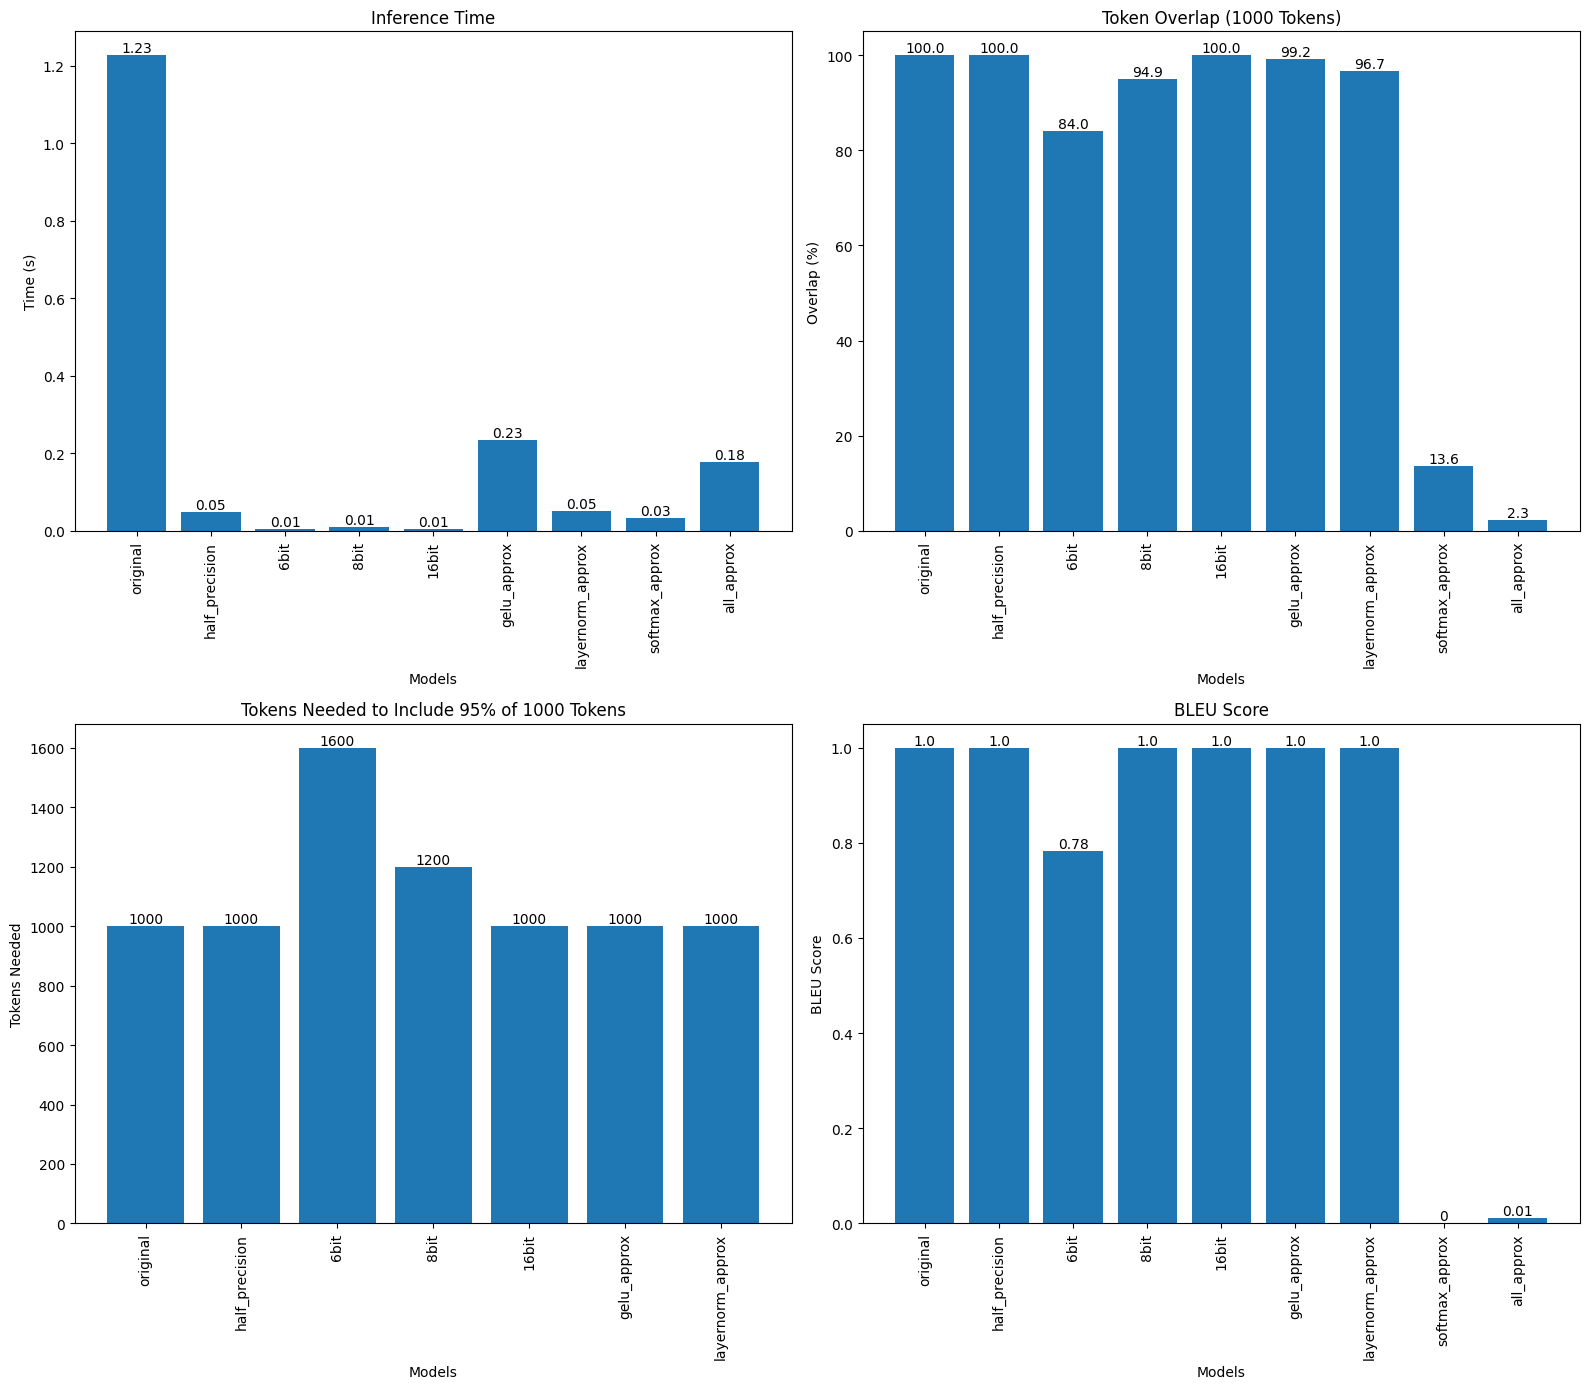

In [5]:
# Sentence Level Performance

evaluator = ModelSentenceEvaluator(models, ground_truth)
sentence = "The <mask> of the situation remained elusive despite exhaustive investigation."
evaluator.all_model_inference(sentence)
evaluator.plot_all_metrics(k, desired_percentage, token_step, max_tokens)

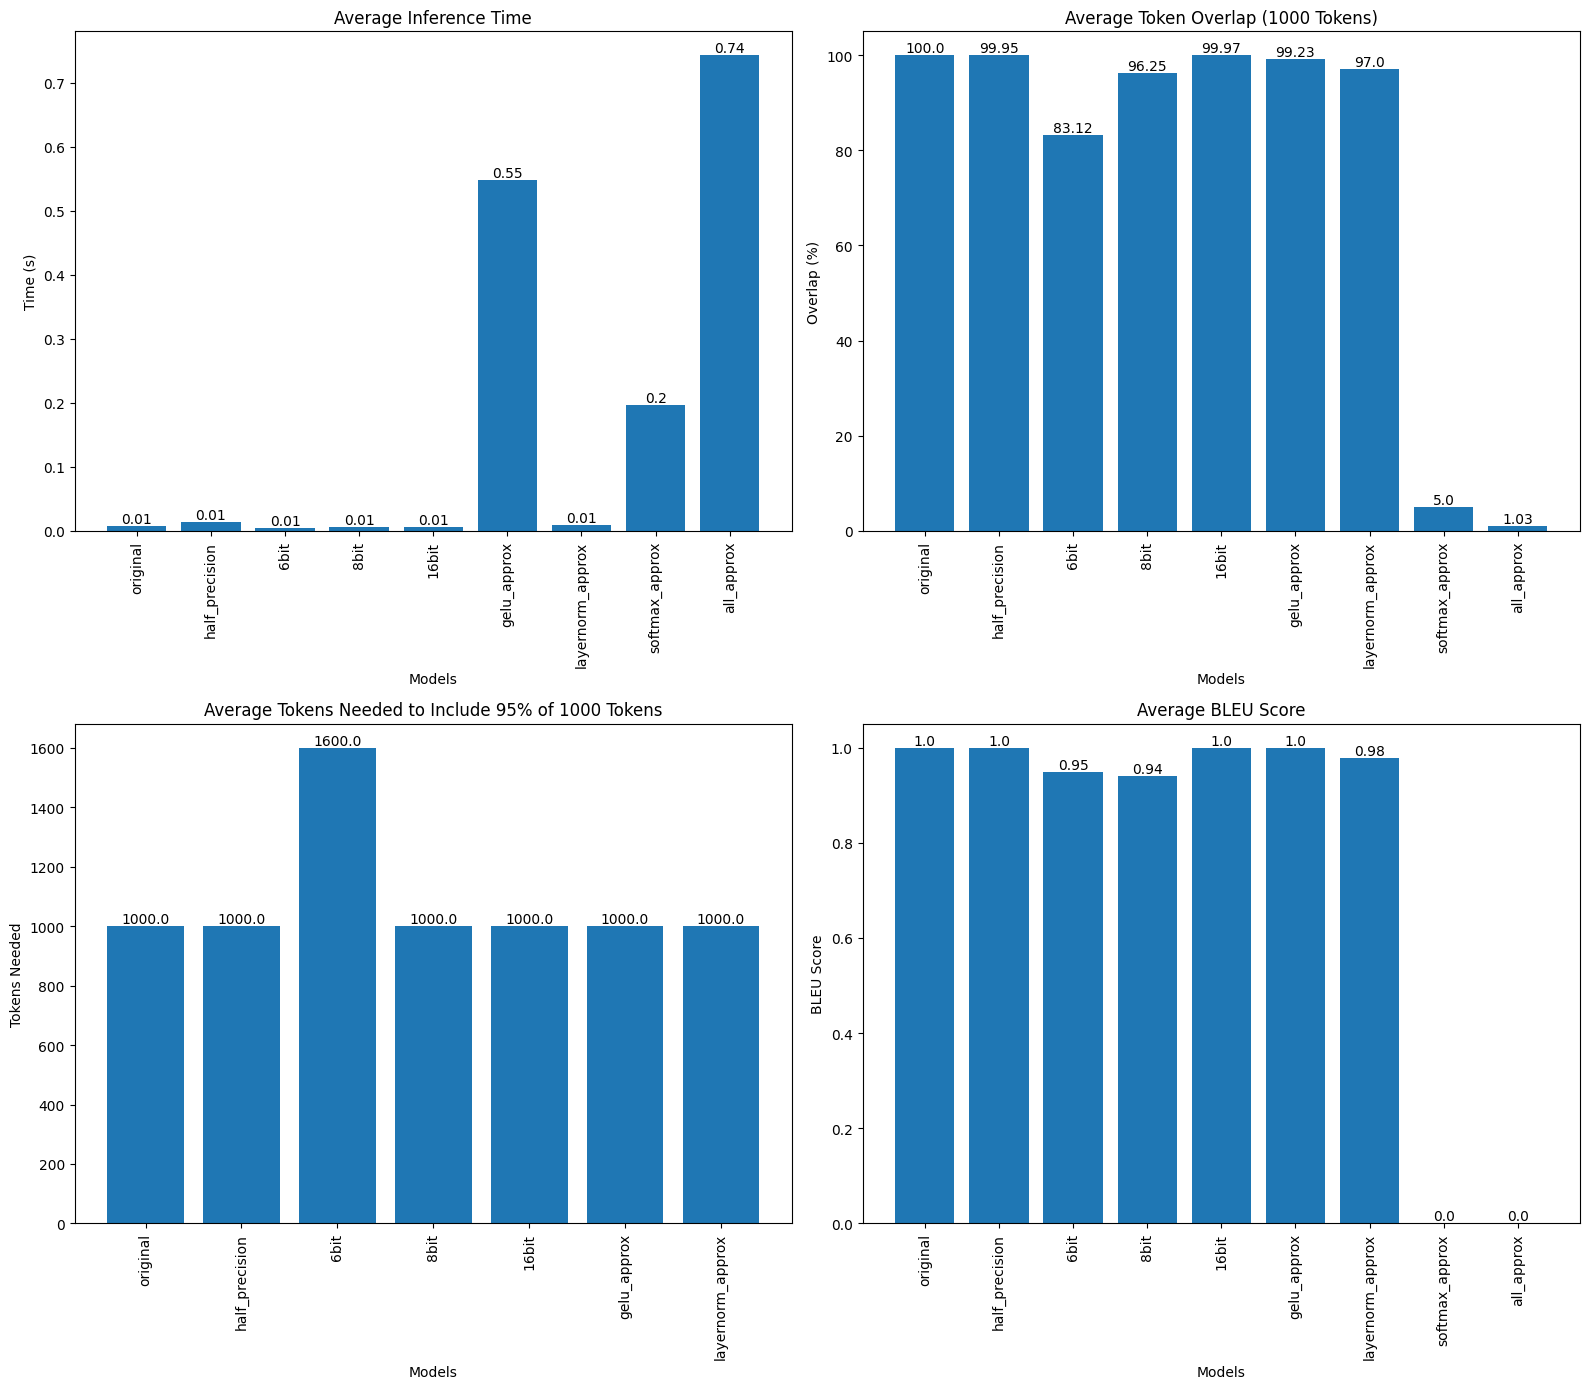

In [6]:
# Dataset Level Performance

dataset_evaluator = DatasetEvaluator(models, ground_truth, training_data)
dataset_evaluator.evaluate(k,desired_percentage)
avg_metrics = dataset_evaluator.average_metrics()
dataset_evaluator.plot_metrics()